<a href="https://colab.research.google.com/github/wodnjse/machine-learning/blob/main/machine_learning_4_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# pd는 관례적으로 사용하는 별칭
import pandas as pd

In [5]:
fish = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/머신러닝/4_1 럭키백/fish.csv')
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


# **데이터 프레임**

1.   **dataframe**
2.   판다스에서 제공하는 **2차원 표** 형식의 주요 데이터 구조
3. 넘파이 배열과 비슷하게 열과 행으로 구성
4. 통계와 그래프를 위한 풍부한 메서드 제공
5. numpy로 상호 변환이 쉽고 사이킷런과도 잘 호환됨
6. 맨 왼쪽의 0, 1, 2숫자는 **행번호**(pandas의 인덱스)
7. 맨위의 species, weight, length, diagonal, height, width는 **열 제목**
8. pandas는 csv파일의 첫 줄을 자동으로 인식해 열 제목으로 구성

####**species: 종류**

####**weight: 몸무게**

####**length: 길이**

####**diagonal: 대각선**

####**height: 높이**

####**width: 두께**



In [6]:
print(pd.unique(fish['Species'])) # pandas의 unique()함수 사용

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


# **입력 데이터 생성**
- Species 열: 타깃 / **나머지 5개 열: 입력 데이터**
- 데이터프레임에서 원하는 열을 리스트로 나열: 5개 열만 선택
- 반환된 새로운 데이터프레임을 **to_numpy()** 메서드로 넘파이 배열로 변경
- [  ] 2개 쓰는 이유: **2차원 배열**


In [11]:
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()
print(fish_input[:5]) # 5열 까지만 출력

[[242.      25.4     30.      11.52     4.02  ]
 [290.      26.3     31.2     12.48     4.3056]
 [340.      26.5     31.1     12.3778   4.6961]
 [363.      29.      33.5     12.73     4.4555]
 [430.      29.      34.      12.444    5.134 ]]


# **타깃 데이터 생성**
- 입력 데이터와 동일한 방식
- [  ] 1개 쓰는 이유: **1차원 배열**

In [12]:
fish_target = fish['Species'].to_numpy()
print(fish_target)

['Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream'
 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream'
 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream'
 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Roach'
 'Roach' 'Roach' 'Roach' 'Roach' 'Roach' 'Roach' 'Roach' 'Roach' 'Roach'
 'Roach' 'Roach' 'Roach' 'Roach' 'Roach' 'Roach' 'Roach' 'Roach' 'Roach'
 'Roach' 'Whitefish' 'Whitefish' 'Whitefish' 'Whitefish' 'Whitefish'
 'Whitefish' 'Parkki' 'Parkki' 'Parkki' 'Parkki' 'Parkki' 'Parkki'
 'Parkki' 'Parkki' 'Parkki' 'Parkki' 'Parkki' 'Perch' 'Perch' 'Perch'
 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch'
 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch'
 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch'
 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch'
 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch'

# **데이터 분류**
- 머신러닝에서는 기본적으로 데이터  세트 2개가 필요하다.

In [13]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state=42)

- 사이킷런의 **StandardScaler** 클래스 사용: 데이터 세트를 **표준화 전처리**!
- **훈련 세트의 통계 값**으로 테스트 세트 변환 필요


In [14]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

# **k-최근접 이웃 분류기의 확률 예측**


1.   **KNeighborsClassifier** 클래스 객체를 만들고 (최근접 이웃 갯수 k를 3으로 지정)
2.   훈련 세트로 **모델 학습** 후
3. 훈련 세트와 테스트 세트의 **점수** 확인



In [17]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier(n_neighbors = 3)
kn.fit(train_scaled, train_target)

print(kn.score(train_scaled, train_target))
print(kn.score(test_scaled, test_target))

0.8907563025210085
0.85


# **다중 분류**
- 현재 데이터셋의 훈련 세트와 테스트 세트의 **타깃 데이터에는 7개의 생선 종류**
- **다중 분류**(multi-class classification)</br>
  : 타깃 데이터에 2개 이상의 클래스가 포함된 문제
- 모델을 만들고 훈련하는 방식은 이진 분류와 동일하다.
- 이중 분류는 클래스가 0과 1
- 사이킷런에서는 편리하게도 **문자열로 된 타깃값 그대로 사용 가능**</br>
  (단 순서가 자동으로 *알파벳 순*으로 매겨짐)

- KNeighborsClassifier에서 정렬된 타깃값: ***classes_*** 속성에 저장




In [21]:
print(kn.classes_)

# Bream이 첫 번째 클래스, Parkki가 두 번째 클래스

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


# **타깃값 예측**

- 사이킷런의 **predict()** 메서드는 **타깃값**으로 예측 출력

In [25]:
print(kn.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']


- **predict_proba()**메서드: 클래스별 확률값 반환

In [26]:
import numpy as np

proba = kn.predict_proba(test_scaled[:5])
print(np.round(proba, decimals = 4))

[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]


- numpy **round**()함수</br>
  : 소수점 첫째 자리에서 반올림
- **decimals** 매개변수</br>
  : 유지할 소수점 아래 자릿수 지정
- 출력 순서는 classes_ 속성과 동일(*알파멧 순서*)

In [27]:
# 네 번째 샘플의 최근접 이웃 클래스 확인
distances, indexes = kn.kneighbors(test_scaled[3:4])
print(train_target[indexes])

[['Roach' 'Perch' 'Perch']]


- Roach: 1/3 = 0.333%
- Perch: 2/3 = 0.667%
- 3개의 최근접 이웃 사용: 가능한 확률은 0/3, 1/3, 2/3, 3/3이 전부</br>
  → 확률이라고 말하기는 좀 애매하다

## **로지스틱 회귀**

# **시그모이드 함수 회귀**

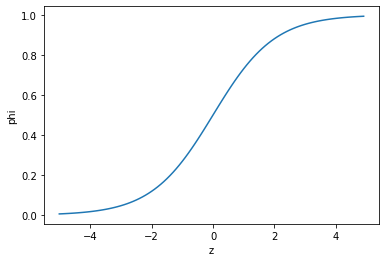

In [50]:
import numpy as np
import matplotlib.pyplot as plt

z = np.arange(- 5, 5, 0.1) # -5와 5 사이에 0.1 간격으로 배열 z를 만듬, z위치마다 시그모이드 함수 계산
phi = 1 / (1 + np.exp(-z)) # np.exp: 지수함수 계산 

plt.plot(z, phi)
plt.xlabel('z')
plt.ylabel('phi')
plt.show()

#### 예제
- **불리언 인덱싱**(boolean indexing): 넘파이 배열은 True, False 값을 전달받아 행 선택 가능
- Ex) 5개의 원소 A, C만 골라내려면 1, 3만 True, 나머진 False

In [56]:
char_arr = np.array(['A', 'B', 'C', 'D', 'E'])
print(char_arr[[True, False, True, False, False]])

['A' 'C']


In [66]:
bream_smelt_indexes = (train_target == 'Bream') | (train_target == 'Smelt') # OR(|)연산자 사용 → 도미와 빙어의 행만 고름
train_bream_smelt = train_scaled[bream_smelt_indexes]
target_bream_smelt = train_target[bream_smelt_indexes]

In [67]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt)

LogisticRegression()

In [ ]:
print(lr.predict(train_bream_smelt[:5]))